-- Hyades open cluster (Epoch J2015.5) -- 

13 <= dec <= 20
62.5 <= ra <= 70.5
13 <= parallax <= 20


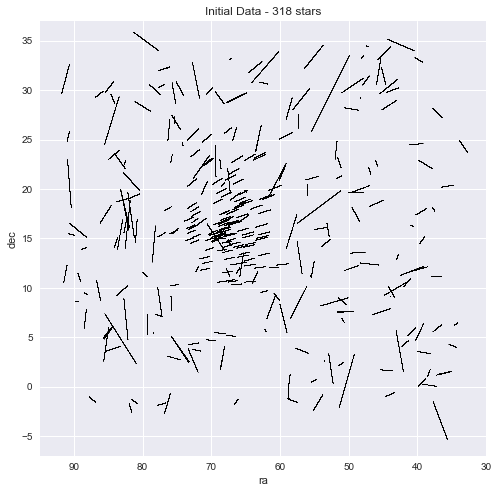

,source_id,ra,dec,pmra,pmdec,radial_velocity,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
0,3.309960e+18,69.022374,15.683901,95.388363,-24.196956,40.618907,19.912606,9.133689,9.590262,8.554814
1,3.268300e+18,50.796378,2.490019,51.261055,-20.751377,11.181746,19.919394,9.309808,9.793065,8.711697
2,2.513600e+18,35.109282,1.589177,150.676927,-23.587093,9.702093,19.930750,8.773954,9.187359,8.241010
3,1.236740e+17,47.093110,31.478150,64.893492,-65.715987,32.078441,19.959363,12.266178,13.332834,11.255599
4,6.318100e+16,56.091543,20.499076,1.275933,-78.347478,-32.920302,19.967373,9.097680,9.531791,8.491036


In [1]:
# Hyades Open Cluster Analysis
data = 'SELECT TOP 10000 gaia.source_id, gaia.ra, gaia.dec, gaia.pmra, gaia.pmdec, gaia.radial_velocity, \
    gaia.parallax, gaia.phot_g_mean_mag, gaia.phot_bp_mean_mag, gaia.phot_rp_mean_mag \
    FROM gaiadr2.gaia_source as gaia WHERE gaia.ra >= 62.5 and gaia.ra <= 70.5 and \
    gaia.dec <= 20 and gaia.dec >= 13 and gaia.parallax > 19.9 and gaia.parallax < 23.1 and \
    gaia.pmra is not null and gaia.pmdec is not null and gaia.phot_bp_mean_mag is not null and \
    gaia.phot_rp_mean_mag is not null and gaia.phot_g_mean_mag is not null and gaia.radial_velocity is not null'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statistics as stat
from datetime import datetime, timedelta
import scipy.stats as st
import random as rand

def pc_ly(x):
    return (1/(float(x)/1000))*3.26156
def mas_deg(x):
    return x*(1/1000)/3600
def abs_mag(x,y):
    return x - (5 * (np.log10(y/10))) 
def color(x,y):
    return [y[i]-x[i] for i in range(len(x))]
    
hyades1 = pd.read_csv('/Users/landonbuechner/Documents/Git Hub Repositories/Hyades-Open-Cluster/hyades_w_rv.csv')

print('-- Hyades open cluster (Epoch J2015.5) -- ')
print()
print('13 <= dec <= 20\n62.5 <= ra <= 70.5\n13 <= parallax <= 20')

dt = ((datetime(2018,10,12) - datetime(2000,1,1)) / timedelta(days=1))/365 #years 
distance = 1/(hyades1['parallax']/1000)
ra0, dec0 = hyades1['ra'], hyades1['dec'] 
pmra, pmdec = mas_deg(hyades1['pmra']), mas_deg(hyades1['pmdec'])

plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.xlim([95,30])
plt.ylim([-7,37])
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Initial Data - {} stars'.format(len(hyades1)))
for i in range(len(hyades1)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*10))
        dec.append(dec0[i]+(pmdec[i]*x*10))
    plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()
hyades1.head()

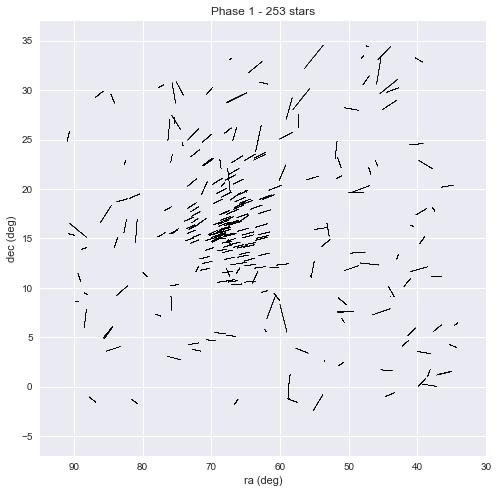

In [61]:
# membership 
members = []
delta = pmdec
mu = np.mean(pmdec)
std = np.std(pmdec)
score1 = [z_score(i,mu,std) for i in delta]
delta = pmra
mu = np.mean(pmra)
std = np.std(pmra)
score2 = [z_score(i,mu,std) for i in delta]
delta = hyades1['radial_velocity']
mu = np.mean(hyades1['radial_velocity'])
std = np.std(hyades1['radial_velocity'])
score3 = [z_score(i,mu,std) for i in delta]
eq_del = pmdec/pmra

for i in range(0,len(delta)):
    if score1[i] >=   -1.645 and score1[i] <=  1.645 \
        and score2[i] >=  -1.645 and score2[i] <=  1.645 \
        and score3[i] >=  -1.645 and score3[i] <=  1.645:
            members.append(list(hyades1.loc[i]))
        
# plotting filtered members 
members = pd.DataFrame(members, columns = list(hyades1))
ra0, dec0 = members['ra'], members['dec'] 
pmra, pmdec = mas_deg(members['pmra']), mas_deg(members['pmdec'])

plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.xlim([95,30])
plt.ylim([-7,37])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Phase 1 - {} stars'.format(len(members)))
for i in range(len(members)):
    ra = []
    dec = []
    for x in range(1,5000,50):
        ra.append(ra0[i]+(pmra[i]*x*10))
        dec.append(dec0[i]+(pmdec[i]*x*10))
    plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()

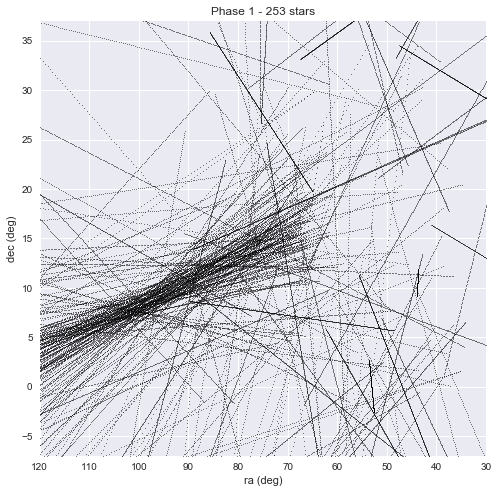

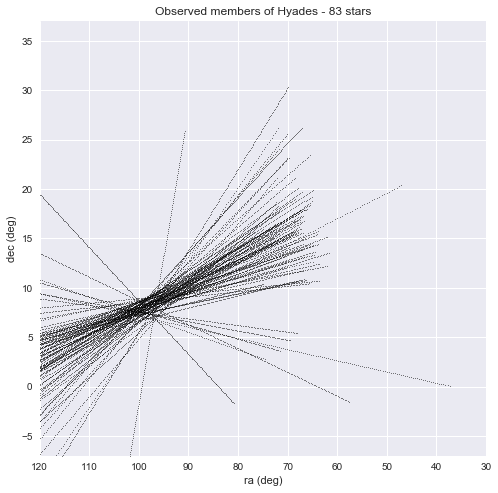

Predicted point of convergence D = [99,96] x [9,6]
Perryman et al., 1998, (96.6 ra, 5.8 dec) 


In [62]:
# view of intermediate filtering over long term
plt.figure(figsize=(8,8))
plt.xlim([120,30])
plt.ylim([-7,37])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Phase 1 - {} stars'.format(len(members)))

for i in range(len(members)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*1000))
        dec.append(dec0[i]+(pmdec[i]*x*1000))
    plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()

# point convergence
final = []
raa = []
decc = []

for i in range(len(members)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*1000))
        dec.append(dec0[i]+(pmdec[i]*x*1000))
    raa.append(ra)
    decc.append(dec)

# D = [99,96] x [9,6]
for i in range(len(raa)):
    for x in range(len(raa[i])):
        if raa[i][x] <= 99 and raa[i][x] >= 96 and \
        decc[i][x] <= 9 and decc[i][x] >= 7:
            final.append(list(members.loc[i]))
            break
            
# plotting results 
plt.figure(figsize=(8,8))
plt.xlim([120,30])
plt.ylim([-7,37])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Observed members of Hyades - {} stars'.format(len(final)))

final = pd.DataFrame(final, columns = list(hyades1))

ra0, dec0 = final['ra'], final['dec'] 
pmra, pmdec = mas_deg(final['pmra']), mas_deg(final['pmdec'])

for i in range(len(final)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*1000))
        dec.append(dec0[i]+(pmdec[i]*x*1000))
    plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()

print('Predicted point of convergence D = [99,96] x [9,6]')
print('Perryman et al., 1998, (96.6 ra, 5.8 dec) ')

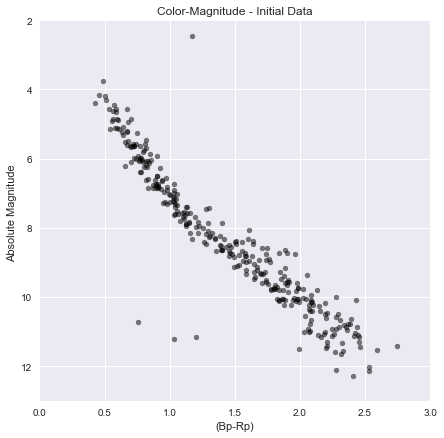

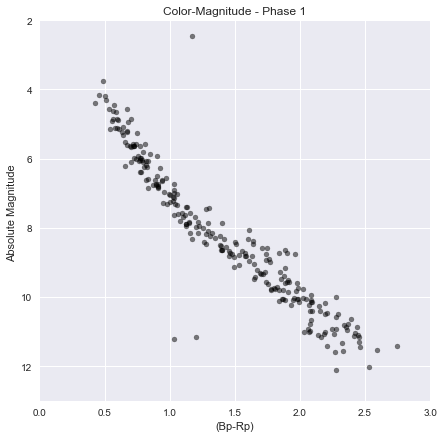

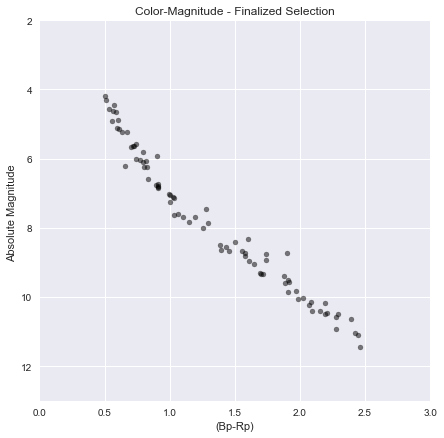

In [63]:
#color magnitude diagrams for different stages of membership
M_g = [abs_mag(hyades1['phot_g_mean_mag'][i],hyades1['parallax'][i]) for i in range(len(hyades1['ra']))]
M_rp = [abs_mag(hyades1['phot_rp_mean_mag'][i],hyades1['parallax'][i]) for i in range(len(hyades1['ra']))]
M_b = [abs_mag(hyades1['phot_bp_mean_mag'][i],hyades1['parallax'][i]) for i in range(len(hyades1['ra']))]
color_index = color(M_rp,M_b)
plt.figure(figsize=(7,7))
plt.title('Color-Magnitude - Initial Data')
plt.xlabel('(Bp-Rp)')
plt.ylabel('Absolute Magnitude ')
plt.xlim([0,3])
plt.ylim([13,2])
plt.scatter(color_index, M_g,marker='o', s=25,alpha = .5, c = 'k')
plt.style.use('seaborn')
plt.show() 

M_g = [abs_mag(members['phot_g_mean_mag'][i],members['parallax'][i]) for i in range(len(members['ra']))]
M_rp = [abs_mag(members['phot_rp_mean_mag'][i],members['parallax'][i]) for i in range(len(members['ra']))]
M_b = [abs_mag(members['phot_bp_mean_mag'][i],members['parallax'][i]) for i in range(len(members['ra']))]
color_index = color(M_rp,M_b)
plt.figure(figsize=(7,7))
plt.title('Color-Magnitude - Phase 1')
plt.xlabel('(Bp-Rp)')
plt.ylabel('Absolute Magnitude ')
plt.xlim([0,3])
plt.ylim([13,2])
plt.scatter(color_index, M_g,marker='o', s=25, alpha = .5,c = 'k')
plt.style.use('seaborn')
plt.show()

M_g = [abs_mag(final['phot_g_mean_mag'][i],final['parallax'][i]) for i in range(len(final['ra']))]
M_rp = [abs_mag(final['phot_rp_mean_mag'][i],final['parallax'][i]) for i in range(len(final['ra']))]
M_b = [abs_mag(final['phot_bp_mean_mag'][i],final['parallax'][i]) for i in range(len(final['ra']))]
color_index = color(M_rp,M_b)
plt.figure(figsize=(7,7))
plt.title('Color-Magnitude - Finalized Selection')
plt.xlabel('(Bp-Rp)')
plt.ylabel('Absolute Magnitude ')
plt.xlim([0,3])
plt.ylim([13,2])
plt.scatter(color_index, M_g,marker='o', s=25, alpha = .5,c = 'k')
plt.style.use('seaborn')
plt.show()

In [64]:
# positions after 1,000,000 years
# parsecs 
final['dist'] = [1/(i/1000) for i in final['parallax']]
# km/s -> pc / yr 
final['rad_v'] = [i*(1.022035e-6) for i in final['radial_velocity']]
finra = []
findec = []
findist = []
pm_scalar = []
# final positions
for i in range(len(final['ra'])):
    finra.append(final['ra'][i] + (mas_deg(final['pmra'][i] * 1000000)))
    findec.append(final['dec'][i] + (mas_deg(final['pmdec'][i] * 1000000)))
    findist.append(final['dist'][i] + final['rad_v'][i]* 1000000) # pc + pc 
    
# arc/yr
for i in range(len(final['pmra'])):
    pm_scalar.append(np.sqrt((final['pmra'][i]/1000)**2+(final['pmdec'][i]/1000)**2))

# km/s
tang_v = [pm_scalar[i]*final['dist'][i]*4.74 for i in range(len(pm_scalar))]
final['finra'] = finra
final['findec'] = findec
final['findist'] = findist
final['tang_v'] = tang_v
final['true_v'] = [np.sqrt((final['tang_v'][i])**2 + (final['rad_v'][i])**2) \
                   for i in range(len(final['tang_v']))]
final.head()

,source_id,ra,dec,pmra,pmdec,radial_velocity,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,dist,rad_v,finra,findec,findist,tang_v,true_v
0,3.309960e+18,69.022374,15.683901,95.388363,-24.196956,40.618907,19.912606,9.133689,9.590262,8.554814,50.219444,0.000042,95.519141,8.962524,91.733389,23.425417,23.425417
1,3.305520e+18,61.644801,13.549050,108.947275,-17.172501,36.433407,20.036022,12.440936,13.643109,11.364717,49.910106,0.000037,91.907933,8.778911,87.146324,26.092293,26.092293
2,3.405990e+18,72.503350,16.411944,84.040474,-27.116427,41.298872,20.240856,10.176132,10.829313,9.434624,49.405024,0.000042,95.847926,8.879603,91.613916,20.679685,20.679685
3,3.310900e+18,66.946427,14.417667,100.486788,-19.207003,39.591527,20.246468,9.211576,9.698178,8.599226,49.391330,0.000040,94.859424,9.082389,89.855256,23.951343,23.951343
4,3.309010e+18,71.626997,15.471935,86.594066,-24.641352,42.041611,20.357130,8.126219,8.481213,7.650042,49.122839,0.000043,95.680904,8.627115,92.090837,20.963212,20.963212


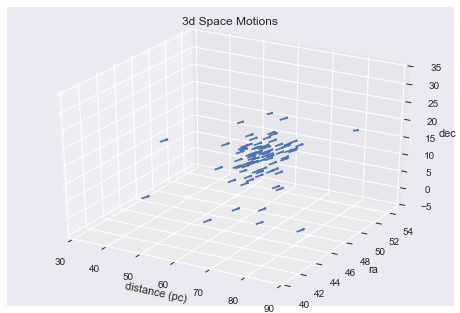

Center of Mass: (67.7936 ra, 15.48 dec)
Perryman et al., 1998, (66.75 ra, 15.6 dec)
Mean true velocity: 23.88 km/s


In [65]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(30, 90)
ax.set_ylim3d(40, 55)
ax.set_zlim3d(-5, 35)
ax.set_ylabel('ra')
ax.set_xlabel('distance (pc)')
ax.set_zlabel('dec')
ax.set_title('3d Space Motions')

start = [final['ra'],final['dist'],final['dec']]
end = [final['finra'],final['findist'],final['findec']]
# ra = y, dist = x, dec = z

ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 1, normalize = True)

plt.show()
print('Center of Mass: ({} ra, {} dec)'.format(round(np.mean(final['ra']),4),round(np.mean(final['dec']),2)))
print('Perryman et al., 1998, (66.75 ra, 15.6 dec)')
print('Mean true velocity: {} km/s'.format(np.round(np.mean(final['true_v']),2)))

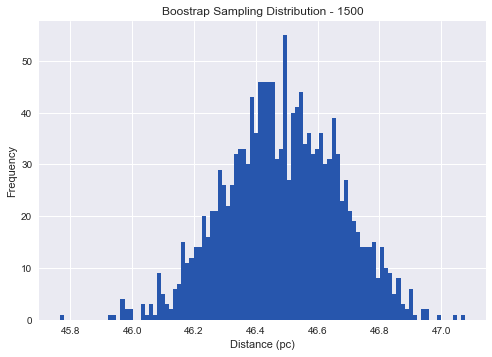

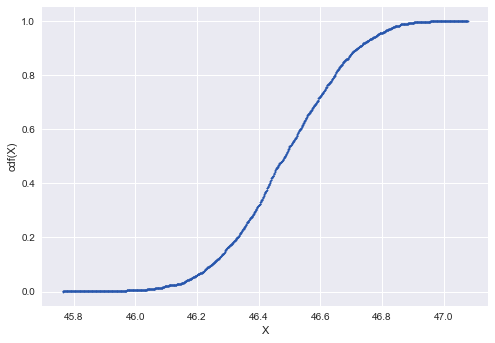

Estimated distance to Hyades open cluster (46.183,46.786), 90% confidence
Perryman et al.(1998), 46.07 parsecs to 46.61 parsecs.


In [66]:
# Estimated distance to Hyades open cluster with 95% level of confidence (bootstrap resampling)
dist = 1/(final['parallax']/1000)
samp = len(dist) # sample size 
p_boot = []
for i in range(1500):
    index = [rand.randint(0,samp-1) for i in range(samp)]
    p_boot.append(np.mean([dist[i] for i in index]))

plt.hist(p_boot,bins = 100, color = (39/255, 86/255, 173/255))
plt.title('Boostrap Sampling Distribution - 1500')
plt.ylabel('Frequency')
plt.xlabel('Distance (pc)')
plt.show()

x = np.arange(round(min(p_boot),3),round(max(p_boot),3),.001)
cdf = []
for i in x:
    cdf.append(sum(x<i for x in p_boot)/len(p_boot))
plt.scatter(x, cdf, s=2, color=(39/255, 86/255, 173/255))
plt.xlabel('X')
plt.ylabel('cdf(X)')
plt.show()

lower = 0
upper = 0
for i in range(len(cdf)):
    if cdf[i] >= .049 and cdf[i] <= .051 :
        lower = i
        break
for i in range(len(cdf)):
    if cdf[i] >= .949 and cdf[i] <= .951:
        upper = i
        break
print('Estimated distance to Hyades open cluster ({},{}), 90% confidence'.format(round(x[lower],4),round(x[upper],4)))
print('Perryman et al.(1998), 46.07 parsecs to 46.61 parsecs.')